In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


In [14]:

df = pd.read_csv('SeoulBikeData.csv', encoding='cp949')
features = ['Temperature(C)', 'Humidity(%)', 'Wind speed (m/s)', 'Seasons']
target = 'Rented Bike Count'


In [15]:

df = df[features + [target]].copy().dropna()
df = pd.get_dummies(df, columns=['Seasons'], drop_first=True)


In [16]:

X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:

lr = LinearRegression()
ridge = Ridge(alpha=1.0)


In [19]:

lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)


Ridge()

In [20]:

y_pred_lr = lr.predict(X_test_scaled)
y_pred_ridge = ridge.predict(X_test_scaled)


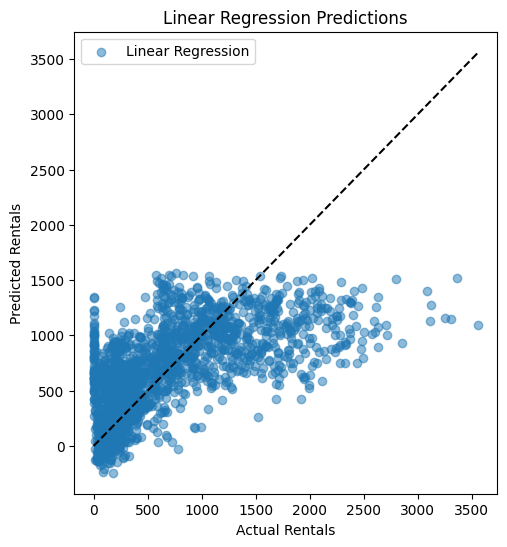

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Linear Regression Predictions')
plt.legend()


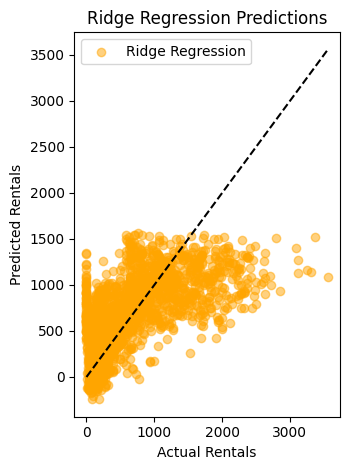

In [22]:

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.5, color='orange', label='Ridge Regression')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Rentals')
plt.ylabel('Predicted Rentals')
plt.title('Ridge Regression Predictions')
plt.legend()

plt.tight_layout()
plt.show()



In [23]:

coef_comparison = pd.DataFrame({
    'Feature': X.columns,
    'LinearRegression': lr.coef_,
    'Ridge': ridge.coef_,
    'Difference': ridge.coef_ - lr.coef_
}).sort_values('LinearRegression', key=abs, ascending=False)


In [24]:

coef_comparison_display = coef_comparison.copy()
coef_comparison_display[['LinearRegression', 'Ridge', 'Difference']] = \
    coef_comparison_display[['LinearRegression', 'Ridge', 'Difference']].round(2)

print("\nCoefficient Comparison:")
print(coef_comparison_display.to_string(index=False))



Coefficient Comparison:
         Feature  LinearRegression   Ridge  Difference
  Temperature(C)            313.72  313.58       -0.14
     Humidity(%)           -182.04 -182.02        0.02
  Seasons_Winter           -111.92 -111.97       -0.05
Wind speed (m/s)             43.29   43.30        0.00
  Seasons_Spring            -38.83  -38.81        0.02
  Seasons_Summer            -31.34  -31.26        0.08


In [25]:

metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression'],
    'R²': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_ridge)],
    'MSE': [mean_squared_error(y_test, y_pred_lr), mean_squared_error(y_test, y_pred_ridge)]
}).round(3)

print("\nPerformance Comparison:")
print(metrics.to_string(index=False))

print("\nInterpretation:")
print("- Ridge coefficients are generally smaller in magnitude (regularization effect)")
print("- Temperature remains the most influential feature in both models")
print(f"- Ridge improved R² by {metrics['R²'].diff()[1]:.3f} and reduced MSE by {metrics['MSE'].diff()[1]:.1f}")


Performance Comparison:
            Model    R²        MSE
Linear Regression 0.398 250764.508
 Ridge Regression 0.398 250765.904

Interpretation:
- Ridge coefficients are generally smaller in magnitude (regularization effect)
- Temperature remains the most influential feature in both models
- Ridge improved R² by 0.000 and reduced MSE by 1.4
